# **Business Challenge 2**

**Team 8:**

Albina Akhmatova

Abi Joshua GEORGE

Ashley JOSI

Janati Nakimera

Chanodome TINGPATTANA



**Purpose of the analysis:**

Floods are one of the most devastating natural phenomena, causing significant damage to the economy and infrastructure of European countries. The purpose of this analysis is to study patterns of flood impacts on infrastructure in the countries studied in order to identify patterns, assess risks, and develop strategies to reduce damage.

**Datasets:**

Copernicus Rapid Mapping: contains geospatial data comprising assessment of the damage to the building under analysis (the data is called “grading product”, download the “vector package”)

https://emergency.copernicus.eu/mapping/list-of-activations-rapid


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas matplotlib seaborn

In [3]:
df = pd.read_csv("flood.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fid         3231 non-null   int64  
 1   obj_type    3231 non-null   object 
 2   info        3231 non-null   object 
 3   damage_gra  3102 non-null   object 
 4   event_time  3231 non-null   object 
 5   country     3231 non-null   object 
 6   filename    3231 non-null   object 
 7   txt         0 non-null      float64
 8   act_id      0 non-null      float64
 9   interpret   0 non-null      float64
 10  settl_type  0 non-null      float64
 11  subtype     0 non-null      float64
 12  functional  0 non-null      float64
 13  road_type   0 non-null      float64
 14  simplified  0 non-null      float64
 15  objectid    0 non-null      float64
 16  length      1110 non-null   float64
 17  area        1768 non-null   float64
 18  area_ha     0 non-null      float64
 19  emsr_id     0 non-null     

# **Part 1:** Exploratory Data Analysis (EDA):
Identifying missing values, distribution patterns, and correlations.


In [4]:
# Delete columns in the DataFrame where all values are null.
df = df.dropna(axis=1, how='all')


In [5]:
# delete fid amd filename

df = df.drop(['filename'], axis=1)
df['event_time'] = pd.to_datetime(df['event_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fid         3231 non-null   int64         
 1   obj_type    3231 non-null   object        
 2   info        3231 non-null   object        
 3   damage_gra  3102 non-null   object        
 4   event_time  3231 non-null   datetime64[ns]
 5   country     3231 non-null   object        
 6   length      1110 non-null   float64       
 7   area        1768 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 202.1+ KB


In [6]:

# Check for duplicates based on all columns
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

# Print the duplicate rows (optional)
print("Duplicate rows:")
duplicate_rows

# Check for duplicates based on specific columns (e.g., 'col1', 'col2')
# duplicate_rows_specific_cols = df[df.duplicated(subset=['col1', 'col2'])]
# print(duplicate_rows_specific_cols)

# Remove duplicate rows (optional)
# df_no_duplicates = df.drop_duplicates()

Number of duplicate rows: 0
Duplicate rows:


,fid,obj_type,info,damage_gra,event_time,country,length,area


In [7]:
# Assuming 'obj_type' column contains strings with numbers you want to remove.

df['obj_type'] = df['obj_type'].str.replace(r'\d+', '', regex=True)

df['obj_type'] = df['obj_type'].str.lstrip()

In [8]:
# creating a new variable: which shows the area in hectares that has been affected by flooding
df['land (ha)'] = df['length'].fillna(0) + df['area'].fillna(0)
df.head(100)


,fid,obj_type,info,damage_gra,event_time,country,length,area,land (ha)
0,1,Non-residential Buildings,1211 Hotel buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000
1,2,Non-residential Buildings,123 Wholesale and retail trade buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000
2,3,Non-residential Buildings,"1241 Communication buildings, stations, termin...",No visible damage,2024-01-03,Germany,NaN,NaN,0.000000
3,4,Non-residential Buildings,1242 Garage buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000
4,5,Non-residential Buildings,1251 Industrial buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...
95,96,Residential Buildings,997 Not Applicable,No visible damage,2024-05-17,Germany,NaN,0.255180,0.255180
96,97,Airfield,2130 Airfield runways,No visible damage,2024-05-17,Germany,NaN,2.411884,2.411884
97,98,"Highways, Streets and Roads",2111 Highways,No visible damage,2024-05-17,Germany,32.510057,NaN,32.510057
98,99,"Highways, Streets and Roads",21120 Primary Road,No visible damage,2024-05-17,Germany,84.735595,NaN,84.735595


In [9]:
# creating a new variable (sector):
sector_mapping = {
    "Residential Buildings": "Real Estate & Urban Development",
    "Non-residential Buildings": "Real Estate & Urban Development",

    "Agricultural Areas": "Agriculture & Natural Resources",
    "Forests and Semi-natural Areas": "Agriculture & Natural Resources",
    "Wetlands": "Agriculture & Natural Resources",

    "Airfield": "Transportation & Mobility",
    "Highways, Streets and Roads": "Transportation & Mobility",
    "Railways": "Transportation & Mobility",
    "Bridges, Elevated Highways, Tunnels and Subways": "Transportation & Mobility",

    "Harbours, waterways, dams and other waterworks": "Energy, Utilities & Industrial Infrastructure",
    "Pipelines, Communication and Electricity Lines": "Energy, Utilities & Industrial Infrastructure",
    "Complex Constructions on Industrial Sites": "Energy, Utilities & Industrial Infrastructure",
    "Other Civil Engineering Works": "Energy, Utilities & Industrial Infrastructure",

    "Unclassified": "Other & Unclassified",
    "Other": "Other & Unclassified"
}

# Apply the mapping to create the new column
df["sector"] = df["obj_type"].map(sector_mapping).fillna("Other & Unclassified")

# Display the updated DataFrame
df.head(20)

,fid,obj_type,info,damage_gra,event_time,country,length,area,land (ha),sector
0,1,Non-residential Buildings,1211 Hotel buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
1,2,Non-residential Buildings,123 Wholesale and retail trade buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
2,3,Non-residential Buildings,"1241 Communication buildings, stations, termin...",No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
3,4,Non-residential Buildings,1242 Garage buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
4,5,Non-residential Buildings,1251 Industrial buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
5,6,Non-residential Buildings,"1263 School, university and research buildings",No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
6,7,Non-residential Buildings,1264 Hospital or institutional care buildings,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
7,8,Non-residential Buildings,1272 Buildings used as places of worship and f...,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
8,9,Non-residential Buildings,1274 Other buildings not elsewhere classified,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development
9,10,Residential Buildings,997 Not Applicable,No visible damage,2024-01-03,Germany,NaN,NaN,0.000000,Real Estate & Urban Development


In [10]:
# Assuming 'sector' column exists in your DataFrame
if 'sector' in df.columns:
    sector_counts = df.groupby('sector')['obj_type'].value_counts()
    print(sector_counts)
else:
    print("Error: 'sector' column not found in the DataFrame.")

sector                                         obj_type                                       
Agriculture & Natural Resources                Agricultural Areas                                 376
                                               Forests and Semi-natural Areas                     215
                                               Wetlands                                            59
Energy, Utilities & Industrial Infrastructure  Pipelines, Communication and Electricity Lines     213
                                               Harbours, waterways, dams and other waterworks     205
                                               Other Civil Engineering Works                      189
                                               Complex Constructions on Industrial Sites          142
Other & Unclassified                           Other                                              122
                                               Unclassified                              

In [11]:

# Remove rows where 'sector' is 'Other & Unclassified'
df = df[df['sector'] != 'Other & Unclassified']

In [12]:
# prompt: посчитать сщгте infrastructure_type

# Assuming 'df' and 'infrastructure_type' column exist

infrastructure_type_counts = df['sector'].value_counts()
infrastructure_type_counts


,count
sector,
Transportation & Mobility,897
Real Estate & Urban Development,769
"Energy, Utilities & Industrial Infrastructure",749
Agriculture & Natural Resources,650


In [13]:
# Creat 2 datasets

germany_data = df[df['country'] == 'Germany']
italy_data = df[df['country'] == 'Italy']


#**Part 2**:  **Analysis of general trends for 2023 to 2024 in Italy and Germany:**

   *   Damage Distribution by infrastructure

   *   The number of floods between 2023 and 2024 in Italy and Germany
   
   *   Damage level analysis in Italy and Germany



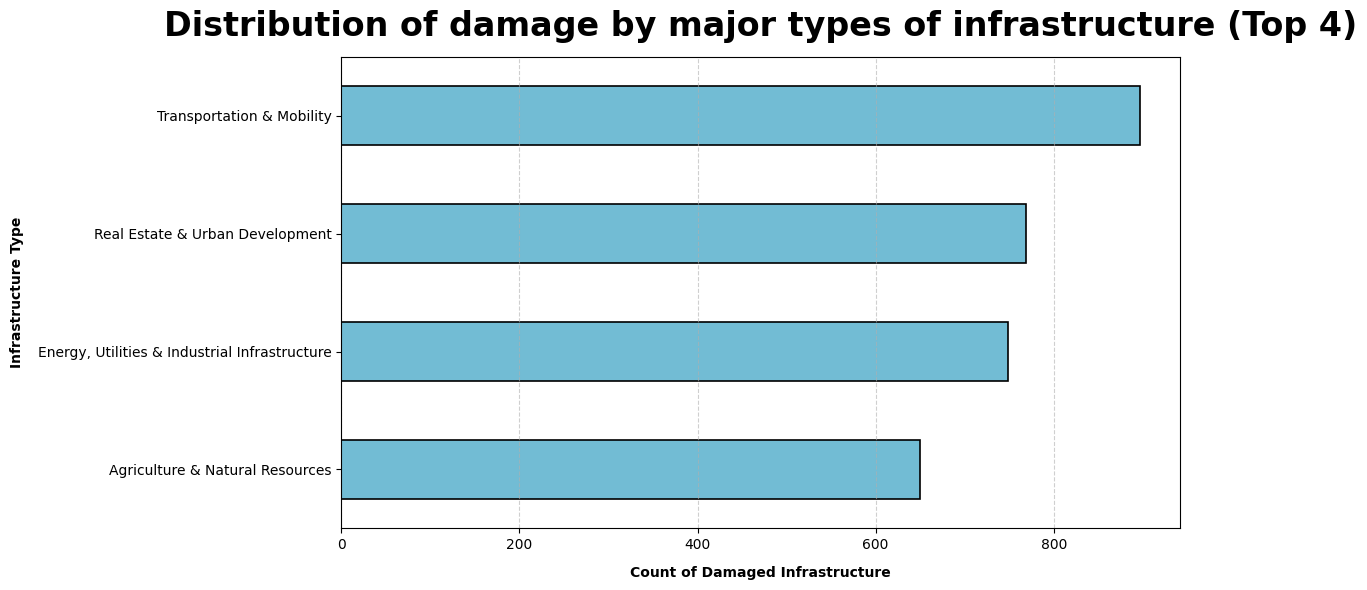

In [14]:

# Setting the style
plt.style.use('default')

# Color detection (light blue)
single_color = "#72bcd4"

# Creating a shape
fig, ax = plt.subplots(figsize=(12, 6))

# Creating a horizontal bar chart
infrastructure_type_counts.sort_values().plot(
    kind='barh',
    color=single_color,
    edgecolor='black',
    linewidth=1.2,
    ax=ax
)

# Headings and signatures
ax.set_title('Distribution of damage by major types of infrastructure (Top 4)', fontsize=24, fontweight='bold', pad=15)
ax.set_xlabel('Count of Damaged Infrastructure', fontsize=10, fontweight='bold', labelpad=10)
ax.set_ylabel('Infrastructure Type', fontsize=10, fontweight='bold', labelpad=10)

# Moving the X-axis captions downwards
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Grid and background settings
ax.set_facecolor('white')
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Optimizing margins
plt.tight_layout()

# Graph display

<ipython-input-15-2ff2dd36c363>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=damage_by_country.index, y=damage_by_country.values, palette=colors)


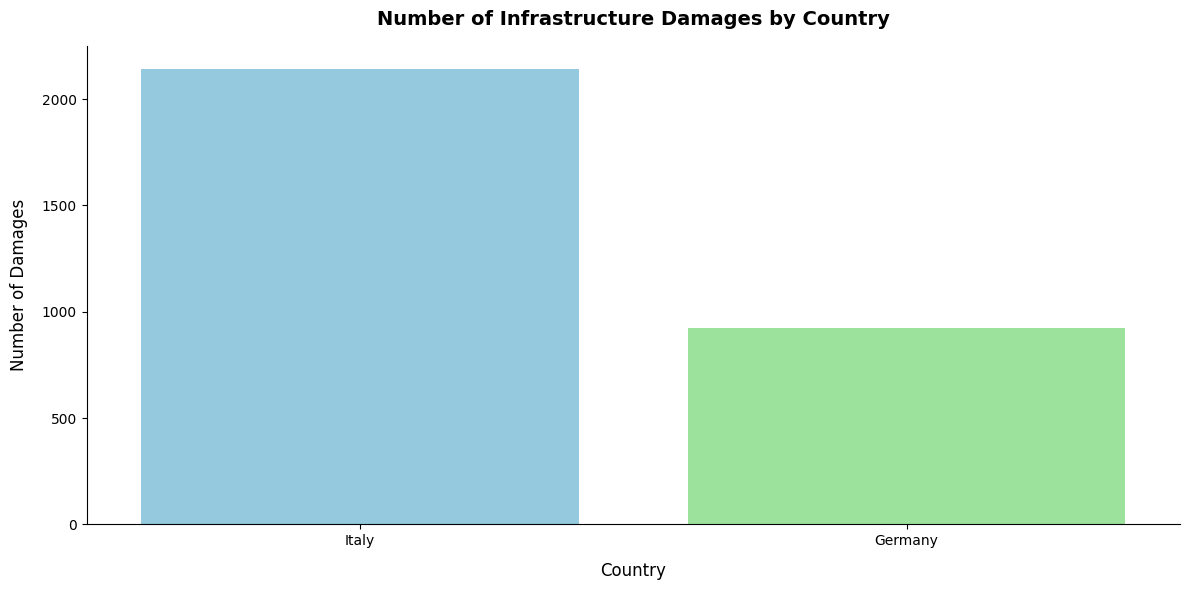

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and count occurrences of damages
damage_by_country = df.groupby('country')['sector'].count().sort_values(ascending=False)

# Set up the figure
plt.figure(figsize=(12, 6))

# Define colors: Italy (skyblue), Germany (lightgreen), others (light gray transparent)
colors = ['skyblue' if country == 'Italy' else 'lightgreen' if country == 'Germany' else '#bdc3c780'
          for country in damage_by_country.index]

# Create barplot with custom colors
sns.barplot(x=damage_by_country.index, y=damage_by_country.values, palette=colors)

# Add titles and labels
plt.title('Number of Infrastructure Damages by Country', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Country', fontsize=12, labelpad=10)
plt.ylabel('Number of Damages', fontsize=12, labelpad=10)

# Make x-axis labels fully written (horizontal)
plt.xticks(rotation=0, ha='center', fontsize=10)

# Remove unnecessary borders
sns.despine()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


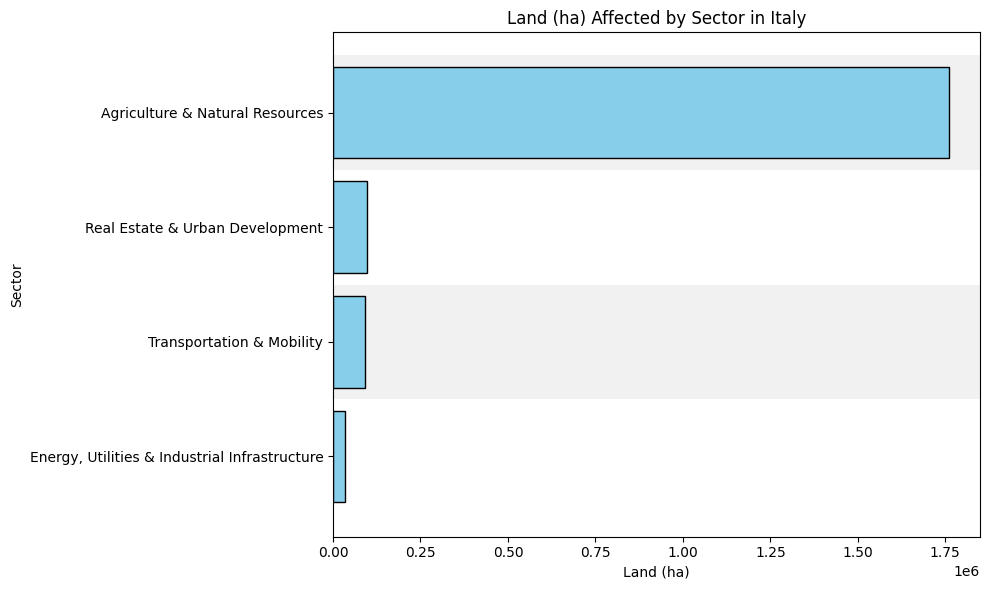

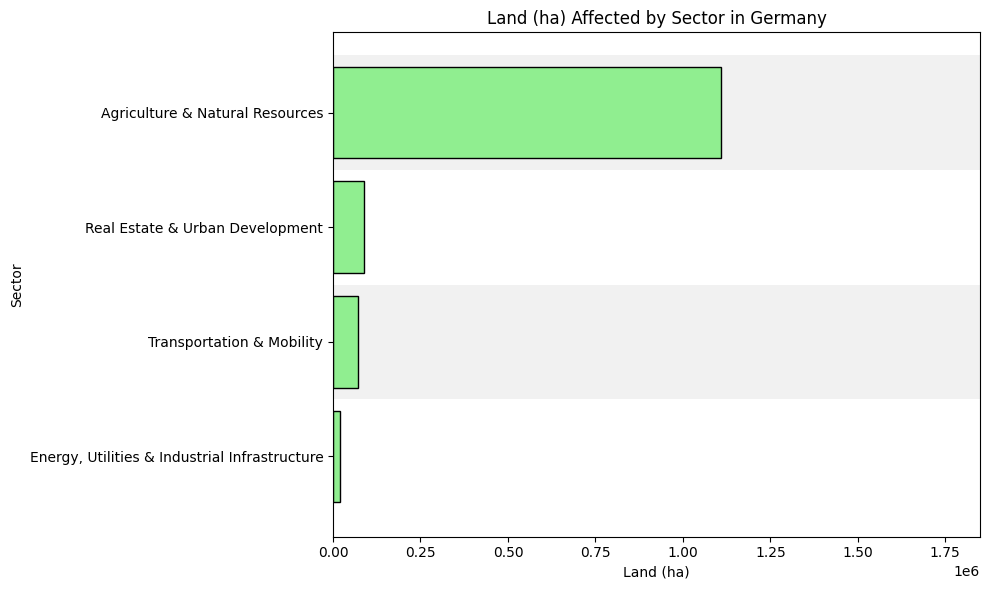

In [16]:
import matplotlib.pyplot as plt
import numpy as np


max_value = max(italy_data.groupby('sector')['land (ha)'].sum().max(),
                germany_data.groupby('sector')['land (ha)'].sum().max()) * 1.05


color_italy = 'skyblue'
color_germany = 'lightgreen'
bg_colors = ['white', 'lightgray']


def plot_horizontal_barh(data, title, color):
    grouped_data = data.groupby('sector')['land (ha)'].sum().sort_values()
    sectors = grouped_data.index
    values = grouped_data.values

    plt.figure(figsize=(10, 6))

    for i in range(len(sectors)):
        plt.axhspan(i - 0.5, i + 0.5, facecolor=bg_colors[i % 2], alpha=0.3)


    plt.barh(sectors, values, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel('Land (ha)')
    plt.ylabel('Sector')
    plt.xlim(0, max_value)

    plt.tight_layout()
    plt.show()


plot_horizontal_barh(italy_data, 'Land (ha) Affected by Sector in Italy', color_italy)
plot_horizontal_barh(germany_data, 'Land (ha) Affected by Sector in Germany', color_germany)


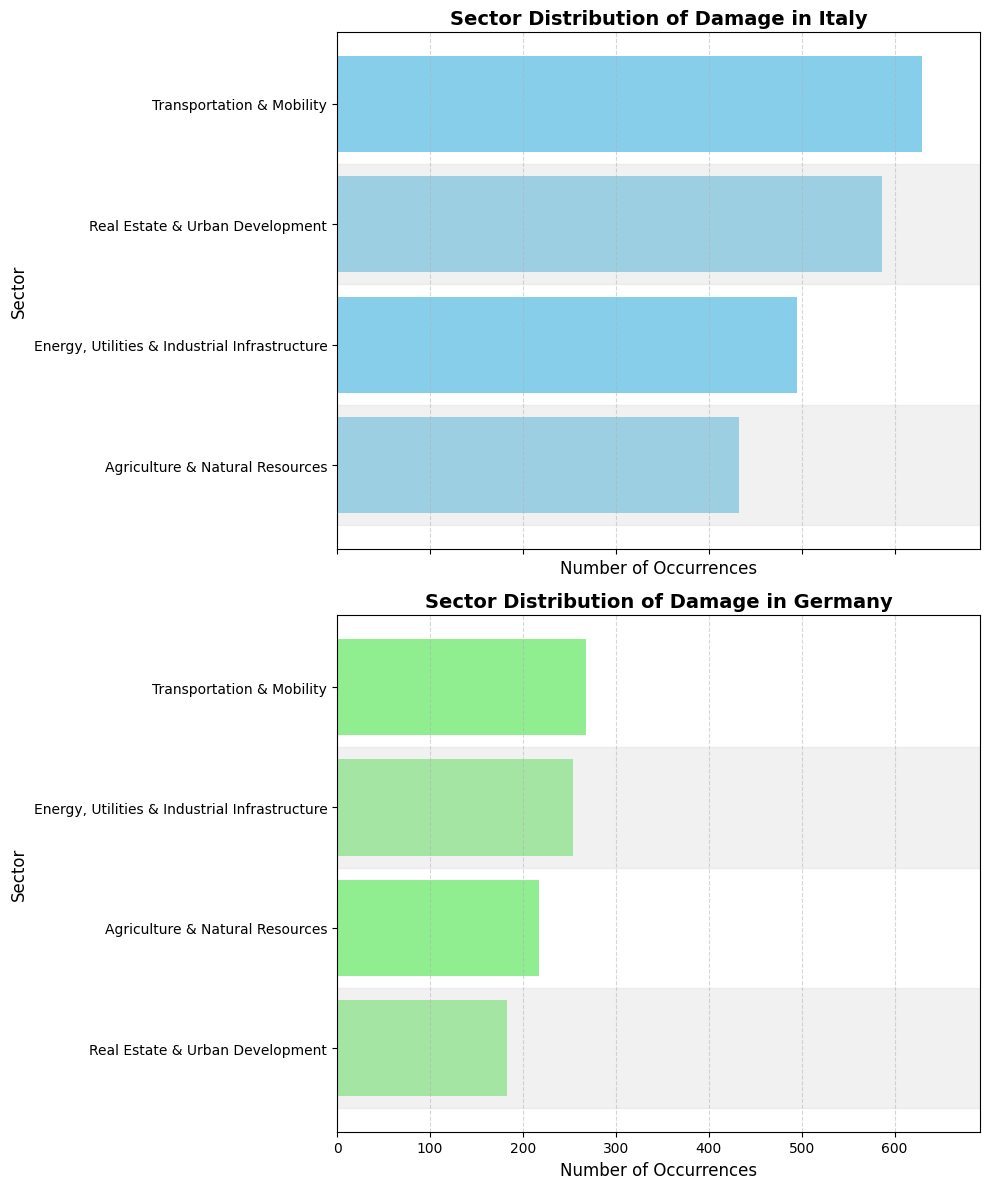

In [17]:
import matplotlib.pyplot as plt

# Define colors for each country
color_italy = 'skyblue'
color_germany = 'lightgreen'

# Get sector-wise counts
italy_counts = italy_data['sector'].value_counts().sort_values()
germany_counts = germany_data['sector'].value_counts().sort_values()

# Find the maximum value to set a common x-axis range
max_value = max(italy_counts.max(), germany_counts.max()) * 1.1  # Adding 10% buffer

# Create figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(10, 12), sharex=True)  # Share x-axis

# Function to plot sector distribution with alternating background colors
def plot_sector_distribution(ax, data, title, color):
    bars = ax.barh(data.index, data.values, color=color)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Occurrences', fontsize=12)
    ax.set_ylabel('Sector', fontsize=12)
    ax.set_xlim(0, max_value)  # Apply the same x-axis limit for both plots

    # Add alternating background colors (white/gray)
    for i, (label, value) in enumerate(zip(data.index, data.values)):
        ax.set_yticks(range(len(data)))  # Set Y-axis ticks
        ax.set_yticklabels(data.index, fontsize=10)
        ax.xaxis.grid(True, linestyle='--', alpha=0.5)  # Add horizontal grid
        if i % 2 == 0:
            ax.axhspan(i - 0.5, i + 0.5, color='lightgray', alpha=0.3)  # Gray stripes

# Plot graphs for Italy and Germany with respective colors
plot_sector_distribution(axes[0], italy_counts, 'Sector Distribution of Damage in Italy', color_italy)
plot_sector_distribution(axes[1], germany_counts, 'Sector Distribution of Damage in Germany', color_germany)

# Improve layout
plt.tight_layout()
plt.show()


<ipython-input-18-4b3847884b23>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['damage_gra'] = pd.Categorical(data['damage_gra'], categories=damage_order, ordered=True)


<Figure size 1200x600 with 0 Axes>

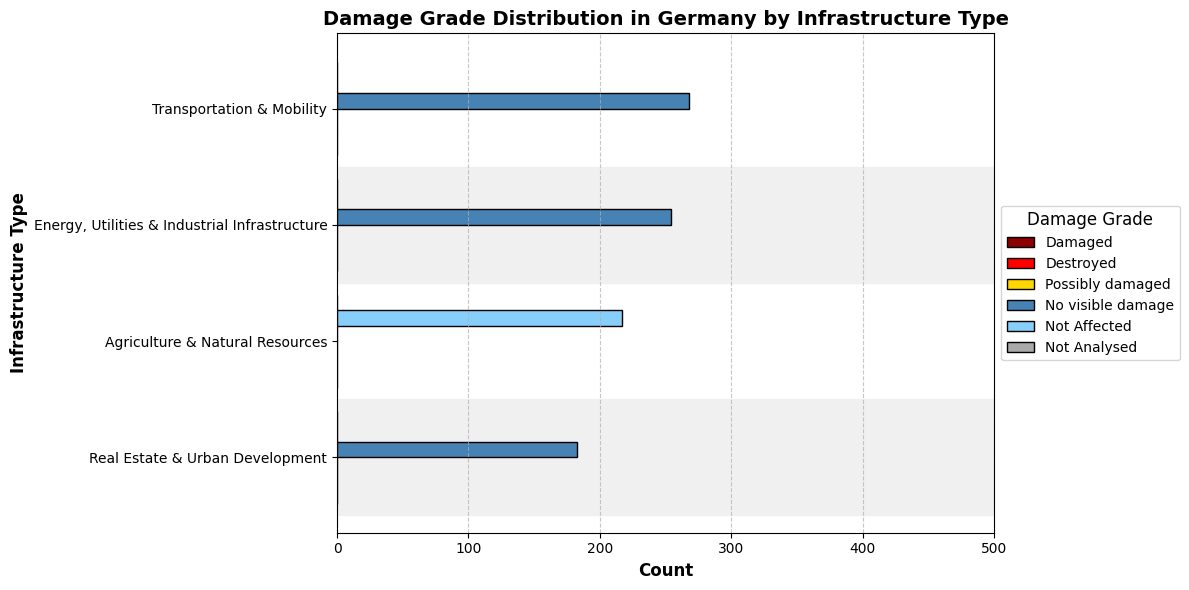

<ipython-input-18-4b3847884b23>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['damage_gra'] = pd.Categorical(data['damage_gra'], categories=damage_order, ordered=True)


<Figure size 1200x600 with 0 Axes>

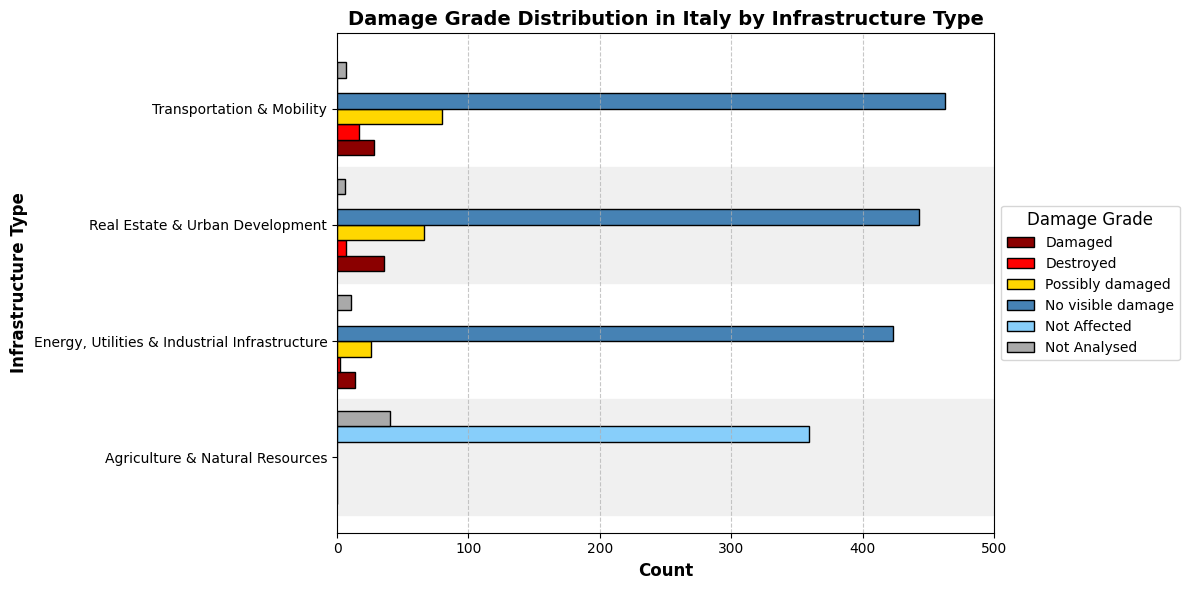

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


custom_colors = {
    'Damaged': '#8B0000',
    'Destroyed': '#FF0000',
    'Possibly damaged': '#FFD700',
    'No visible damage': '#4682B4',
    'Not Affected': '#87CEFA',
    'Not Analysed': '#A9A9A9',
}

damage_order = ['Damaged', 'Destroyed', 'Possibly damaged', 'No visible damage', 'Not Affected', 'Not Analysed']


def plot_damage_distribution(data, country):

    data['damage_gra'] = pd.Categorical(data['damage_gra'], categories=damage_order, ordered=True)


    damage_counts = data.groupby('sector')['damage_gra'].value_counts().unstack()
    damage_counts = damage_counts.loc[damage_counts.sum(axis=1).sort_values(ascending=True).index]


    damage_counts = damage_counts[damage_order]

    plt.figure(figsize=(12, 6))
    ax = damage_counts.plot(kind='barh', stacked=False, width=0.8, edgecolor='black', figsize=(12, 6),
                            color=[custom_colors.get(col, 'gray') for col in damage_counts.columns])

    y_ticks = np.arange(len(damage_counts))
    for i in range(0, len(y_ticks), 2):
        ax.axhspan(y_ticks[i] - 0.5, y_ticks[i] + 0.5, color='#f0f0f0', zorder=-1)


    plt.xlim(0, 500)


    plt.title(f'Damage Grade Distribution in {country} by Infrastructure Type', fontsize=14, fontweight='bold')
    plt.xlabel('Count', fontsize=12, fontweight='bold')
    plt.ylabel('Infrastructure Type', fontsize=12, fontweight='bold')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)


    plt.legend(title="Damage Grade", title_fontsize=12, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))


    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


plot_damage_distribution(germany_data, "Germany")
plot_damage_distribution(italy_data, "Italy")


In [19]:
# create a new damage_level variable where if damage_gra = 'Not Affected' 'Not Analyzed' 'No visible damage' then takes the value low
# damage_gra ='Possibly damaged' then medium if damage_gra = 'Damaged' 'Destroyed' then high in italy_data

# Create the 'damage_level' column in italy_data
italy_data['damage_level'] = 'low'  # Initialize all values to 'low'

# Update 'damage_level' based on 'damage_gra' values
italy_data.loc[italy_data['damage_gra'] == 'Possibly damaged', 'damage_level'] = 'medium'
italy_data.loc[italy_data['damage_gra'].isin(['Damaged', 'Destroyed']), 'damage_level'] = 'high'


<ipython-input-19-021a4019f8c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_data['damage_level'] = 'low'  # Initialize all values to 'low'


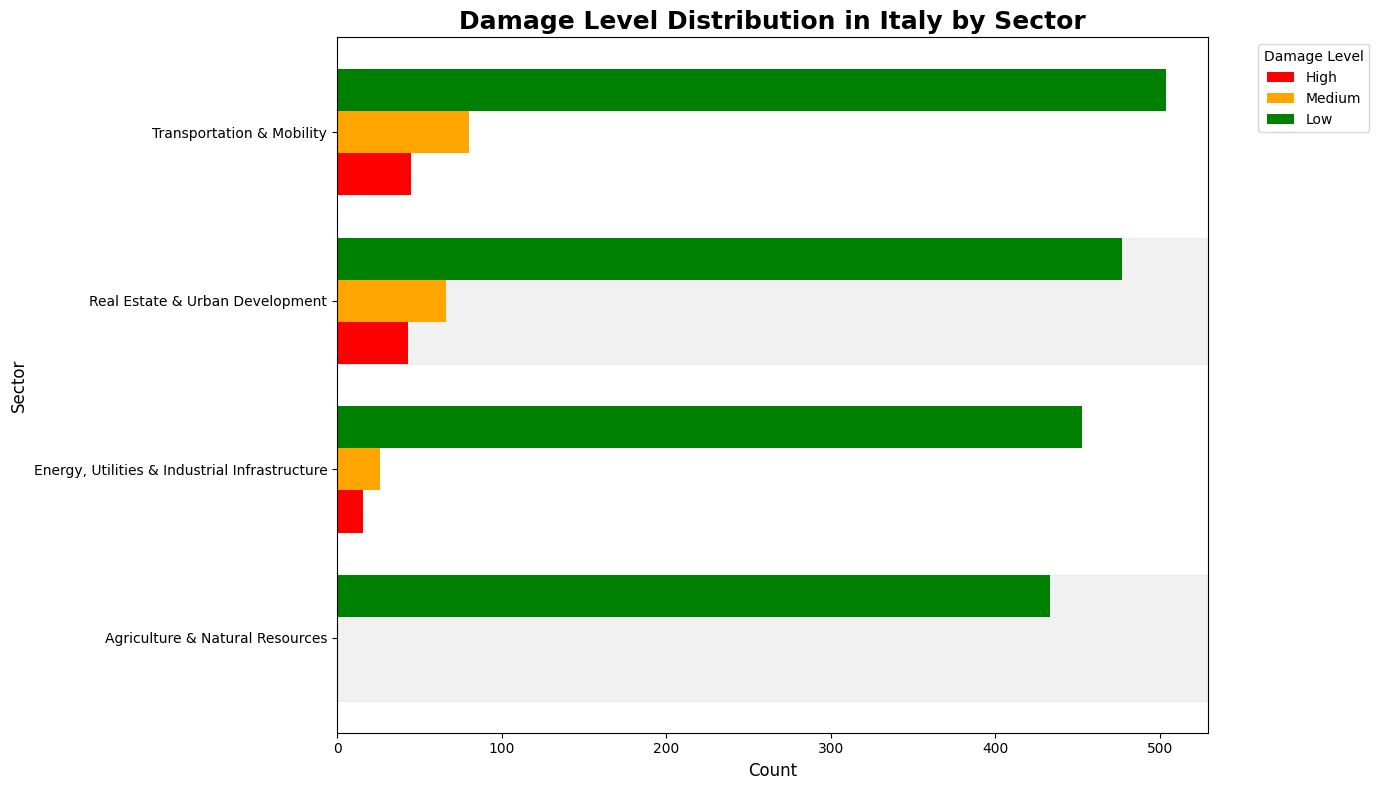

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

# We are determining the damage levels that we will display
damage_levels = ['low', 'medium', 'high']

# Filtering the data, leaving only the necessary damage_level
filtered_data = italy_data[italy_data['damage_level'].isin(damage_levels)]

# Creating a summary table with a count of the number of damage levels by sector
damage_pivot = filtered_data.pivot_table(index='sector', columns='damage_level', aggfunc='size', fill_value=0)

# Sorting the damage levels within each sector
damage_pivot = damage_pivot[damage_pivot.sum().sort_values().index]

# We sort the sectors by the total amount of damage
damage_pivot['total'] = damage_pivot.sum(axis=1)
damage_pivot = damage_pivot.sort_values(by='total')
damage_pivot = damage_pivot.drop(columns=['total'])

# Creating a shape and axes with increased width
fig, ax = plt.subplots(figsize=(14, 8))

# We determine the number of sectors and positions for the columns
sectors = damage_pivot.index
y = np.arange(len(sectors))

# Defining the width of the columns
bar_height = 0.25

colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}


damage_levels_sorted = damage_pivot.sum().sort_values().index.tolist()


for i in range(len(sectors)):
    color = 'lightgray' if i % 2 == 0 else 'white'
    ax.axhspan(y[i] - bar_height / 2, y[i] + bar_height * (len(damage_levels_sorted) - 0.5), color=color, alpha=0.3)


for i, level in enumerate(damage_levels_sorted):
    if level in damage_pivot.columns:
        ax.barh(y + i * bar_height, damage_pivot[level], height=bar_height, label=level.capitalize(), color=colors[level])


ax.set_title('Damage Level Distribution in Italy by Sector', fontsize=18, fontweight='bold')  # Увеличен шрифт и сделан жирным
ax.set_ylabel('Sector', fontsize=12)
ax.set_xlabel('Count', fontsize=12)
ax.set_yticks(y + bar_height)
ax.set_yticklabels(sectors)


ax.legend(title='Damage Level', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()

# Отображение графика
plt.show()


# **Part 3:** Analysis key physical (building material, year of construction, structural design) and socio-economic variables

In [21]:
# Assuming 'sector' column exists in your DataFrame
if 'sector' in df.columns:
    sector_counts = df.groupby('sector')['obj_type'].value_counts()
    print(sector_counts)
else:
    print("Error: 'sector' column not found in the DataFrame.")

sector                                         obj_type                                       
Agriculture & Natural Resources                Agricultural Areas                                 376
                                               Forests and Semi-natural Areas                     215
                                               Wetlands                                            59
Energy, Utilities & Industrial Infrastructure  Pipelines, Communication and Electricity Lines     213
                                               Harbours, waterways, dams and other waterworks     205
                                               Other Civil Engineering Works                      189
                                               Complex Constructions on Industrial Sites          142
Real Estate & Urban Development                Non-residential Buildings                          603
                                               Residential Buildings                     

In [22]:
# Define selected object types
selected_object_types = [
    "Agricultural Areas",
    "Forests and Semi-natural Areas",
    "Wetlands",
    "Pipelines, Communication and Electricity Lines",
    "Harbours, Waterways, Dams and Other Waterworks",
    "Complex Constructions on Industrial Sites",
    "Non-residential Buildings",
    "Residential Buildings",
    "Highways, Streets and Roads",
    "Railways",
    "Bridges, Elevated Highways, Tunnels and Subways"
]

# Extract unique infrastructures (info field) for each selected object type
infrastructure_selection = {}

for obj_type in selected_object_types:
    infrastructures = df[df["obj_type"] == obj_type]["info"].dropna().unique()
    infrastructure_selection[obj_type] = infrastructures[:3]  # Select top 3 unique values

# Convert to DataFrame for easy viewing
infrastructure_df = pd.DataFrame.from_dict(infrastructure_selection, orient="index", columns=["Infrastructure 1", "Infrastructure 2", "Infrastructure 3"])

# Save the extracted data for reference
infrastructure_df.to_csv("selected_infrastructures.csv", index=True)

# Display the selected infrastructures using pandas' display function
# This replaces the call to the unavailable 'ace_tools' module.
display(infrastructure_df)




,Infrastructure 1,Infrastructure 2,Infrastructure 3
Agricultural Areas,21 Arable land,23 Pastures,22 Permanent crops
Forests and Semi-natural Areas,31 Forests,32 Shrub and/or herbaceous vegetation association,33 Open spaces with little or no vegetation
Wetlands,41 Inland wetlands,42 Coastal wetlands,None
"Pipelines, Communication and Electricity Lines","221 Long-distance pipelines, communication and...",222 Local pipelines and cables,None
"Harbours, Waterways, Dams and Other Waterworks",None,None,None
Complex Constructions on Industrial Sites,2301 Constructions for mining or extraction,2302 Power plant constructions,None
Non-residential Buildings,1211 Hotel buildings,123 Wholesale and retail trade buildings,"1241 Communication buildings, stations, termin..."
Residential Buildings,997 Not Applicable,None,None
"Highways, Streets and Roads",2111 Highways,21120 Primary Road,21121 Secondary Road
Railways,2121 Long-distance railways,21220 Tramway,21210 Railway Yard


In [23]:
import pandas as pd

# Define the selected infrastructures by sector
data = {
    "Sector": [
        "Agriculture & Natural Resources",
        "Agriculture & Natural Resources",
        "Agriculture & Natural Resources",
        "Energy, Utilities & Industrial Infrastructure",
        "Energy, Utilities & Industrial Infrastructure",
        "Energy, Utilities & Industrial Infrastructure",
        "Real Estate & Urban Development",
        "Real Estate & Urban Development",
        "Real Estate & Urban Development",
        "Transportation & Mobility",
        "Transportation & Mobility",
        "Transportation & Mobility"
    ],
    "Infrastructure": [
        "21 Arable Land",
        "31 Forests",
        "41 Inland Wetlands",
        "221 Long-distance pipelines, communication and cables",
        "2301 Constructions for mining or extraction",
        "2302 Power plant constructions",
        "1211 Hotel buildings",
        "123 Wholesale and retail trade buildings",
        "1241 Communication buildings, stations, terminals",
        "2111 Highways",
        "2121 Long-distance railways",
        "2141 Bridges and elevated highways"
    ]
}

# Create DataFrame
infra_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
infra_df.to_csv("selected_infrastructure_by_sector.csv", index=False)

# Display the DataFrame using pandas display function
# This replaces the call to the unavailable 'ace_tools' module.
display(infra_df)

,Sector,Infrastructure
0,Agriculture & Natural Resources,21 Arable Land
1,Agriculture & Natural Resources,31 Forests
2,Agriculture & Natural Resources,41 Inland Wetlands
3,"Energy, Utilities & Industrial Infrastructure","221 Long-distance pipelines, communication and..."
4,"Energy, Utilities & Industrial Infrastructure",2301 Constructions for mining or extraction
5,"Energy, Utilities & Industrial Infrastructure",2302 Power plant constructions
6,Real Estate & Urban Development,1211 Hotel buildings
7,Real Estate & Urban Development,123 Wholesale and retail trade buildings
8,Real Estate & Urban Development,"1241 Communication buildings, stations, terminals"
9,Transportation & Mobility,2111 Highways


In [24]:
# Install any necessary modules
!pip install pandas matplotlib seaborn

# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Define selected object types and sectors
selected_object_types = [
    "Agricultural Areas",
    "Forests and Semi-natural Areas",
    "Wetlands",
    "Pipelines, Communication and Electricity Lines",
    "Harbours, Waterways, Dams and Other Waterworks",
    "Complex Constructions on Industrial Sites",
    "Non-residential Buildings",
    "Residential Buildings",
    "Highways, Streets and Roads",
    "Railways",
    "Bridges, Elevated Highways, Tunnels and Subways"
]

# Define selected infrastructures by sector
data = {
    "Sector": [
        "Agriculture & Natural Resources",
        "Agriculture & Natural Resources",
        "Agriculture & Natural Resources",
        "Energy, Utilities & Industrial Infrastructure",
        "Energy, Utilities & Industrial Infrastructure",
        "Energy, Utilities & Industrial Infrastructure",
        "Real Estate & Urban Development",
        "Real Estate & Urban Development",
        "Real Estate & Urban Development",
        "Transportation & Mobility",
        "Transportation & Mobility",
        "Transportation & Mobility"
    ],
    "Infrastructure": [
        "21 Arable Land",
        "31 Forests",
        "41 Inland Wetlands",
        "221 Long-distance pipelines, communication and cables",
        "2301 Constructions for mining or extraction",
        "2302 Power plant constructions",
        "1211 Hotel buildings",
        "123 Wholesale and retail trade buildings",
        "1241 Communication buildings, stations, terminals",
        "2111 Highways",
        "2121 Long-distance railways",
        "2141 Bridges and elevated highways"
    ]
}

# Create DataFrame for sectors
sector_df = pd.DataFrame(data)

# Extract unique infrastructures (info field) and count damage cases for each selected object type
infrastructure_selection = {}

for obj_type in selected_object_types:
    filtered_df = df[df["obj_type"] == obj_type]
    infrastructures = filtered_df["info"].dropna().unique()
    # Instead of counting a non-existent "damage" column, we count the rows in the filtered DataFrame.
    damage_count = filtered_df.shape[0] #This will count all the rows

    infrastructure_selection[obj_type] = {
        "Infrastructure 1": infrastructures[0] if len(infrastructures) > 0 else None,
        "Infrastructure 2": infrastructures[1] if len(infrastructures) > 1 else None,
        "Infrastructure 3": infrastructures[2] if len(infrastructures) > 2 else None,
        "Total Count": len(infrastructures),
        "Damage Cases": damage_count #This value is now the number of rows in the filtered dataframe
    }

# Convert to DataFrame for easy viewing
infrastructure_df = pd.DataFrame.from_dict(infrastructure_selection, orient="index")

# Save the extracted data for reference
sector_df.to_csv("selected_infrastructure_by_sector.csv", index=False)
infrastructure_df.to_csv("selected_infrastructures.csv", index=True)

# Display the DataFrames
display(sector_df)
display(infrastructure_df)

,Sector,Infrastructure
0,Agriculture & Natural Resources,21 Arable Land
1,Agriculture & Natural Resources,31 Forests
2,Agriculture & Natural Resources,41 Inland Wetlands
3,"Energy, Utilities & Industrial Infrastructure","221 Long-distance pipelines, communication and..."
4,"Energy, Utilities & Industrial Infrastructure",2301 Constructions for mining or extraction
5,"Energy, Utilities & Industrial Infrastructure",2302 Power plant constructions
6,Real Estate & Urban Development,1211 Hotel buildings
7,Real Estate & Urban Development,123 Wholesale and retail trade buildings
8,Real Estate & Urban Development,"1241 Communication buildings, stations, terminals"
9,Transportation & Mobility,2111 Highways


,Infrastructure 1,Infrastructure 2,Infrastructure 3,Total Count,Damage Cases
Agricultural Areas,21 Arable land,23 Pastures,22 Permanent crops,4,376
Forests and Semi-natural Areas,31 Forests,32 Shrub and/or herbaceous vegetation association,33 Open spaces with little or no vegetation,3,215
Wetlands,41 Inland wetlands,42 Coastal wetlands,None,2,59
"Pipelines, Communication and Electricity Lines","221 Long-distance pipelines, communication and...",222 Local pipelines and cables,None,2,213
"Harbours, Waterways, Dams and Other Waterworks",None,None,None,0,0
Complex Constructions on Industrial Sites,2301 Constructions for mining or extraction,2302 Power plant constructions,None,2,142
Non-residential Buildings,1211 Hotel buildings,123 Wholesale and retail trade buildings,"1241 Communication buildings, stations, termin...",24,603
Residential Buildings,997 Not Applicable,None,None,1,166
"Highways, Streets and Roads",2111 Highways,21120 Primary Road,21121 Secondary Road,7,634
Railways,2121 Long-distance railways,21220 Tramway,21210 Railway Yard,4,130


In [25]:
import pandas as pd

# Define the selected infrastructures with key physical factors
data = {
    "Sector": [
        "Agriculture & Natural Resources", "Agriculture & Natural Resources", "Agriculture & Natural Resources",
        "Energy, Utilities & Industrial Infrastructure", "Energy, Utilities & Industrial Infrastructure", "Energy, Utilities & Industrial Infrastructure",
        "Real Estate & Urban Development", "Real Estate & Urban Development", "Real Estate & Urban Development",
        "Transportation & Mobility", "Transportation & Mobility", "Transportation & Mobility"
    ],
    "Infrastructure": [
        "21 Arable Land", "31 Forests", "41 Inland Wetlands",
        "221 Long-distance pipelines, communication and cables", "2301 Constructions for mining or extraction", "2302 Power plant constructions",
        "1211 Hotel buildings", "123 Wholesale and retail trade buildings", "1241 Communication buildings, stations, terminals",
        "2111 Highways", "2121 Long-distance railways", "2141 Bridges and elevated highways"
    ],
    "Building Material": [
        "Soil/Natural Land", "Trees/Natural Vegetation", "Wetland Ecosystem",
        "Steel/Plastic", "Concrete/Steel", "Concrete/Steel",
        "Concrete/Steel", "Brick/Concrete", "Concrete/Steel",
        "Asphalt/Concrete", "Steel/Concrete", "Concrete/Steel"
    ],
    "Year of Construction": [
        "Not Applicable", "Not Applicable", "Not Applicable",
        "Post-2000", "Varies", "Post-2000",
        "Pre-2000/Post-2000", "Pre-2000", "Post-2000",
        "Varies", "Post-2000", "Post-2000"
    ],
    "Structural Design": [
        "Flat/Open", "Flat/Natural Buffer", "Flat/Natural Buffer",
        "Elevated/Drained", "Flat/Reinforced", "Flat/Reinforced",
        "Flat/Elevated (if modern)", "Flat/Undrained", "Elevated/Reinforced",
        "Flat/Drained", "Elevated/Reinforced", "Elevated/Drained"
    ]
}

# Create DataFrame
infra_df = pd.DataFrame(data)

# Save the updated DataFrame to a CSV file
infra_df.to_csv("selected_infrastructure_with_physical_factors.csv", index=False)

# Display the DataFrame using pandas' display function
# This replaces the call to the unavailable 'ace_tools' module.
display(infra_df) # Changed this line to use pandas' display function

,Sector,Infrastructure,Building Material,Year of Construction,Structural Design
0,Agriculture & Natural Resources,21 Arable Land,Soil/Natural Land,Not Applicable,Flat/Open
1,Agriculture & Natural Resources,31 Forests,Trees/Natural Vegetation,Not Applicable,Flat/Natural Buffer
2,Agriculture & Natural Resources,41 Inland Wetlands,Wetland Ecosystem,Not Applicable,Flat/Natural Buffer
3,"Energy, Utilities & Industrial Infrastructure","221 Long-distance pipelines, communication and...",Steel/Plastic,Post-2000,Elevated/Drained
4,"Energy, Utilities & Industrial Infrastructure",2301 Constructions for mining or extraction,Concrete/Steel,Varies,Flat/Reinforced
5,"Energy, Utilities & Industrial Infrastructure",2302 Power plant constructions,Concrete/Steel,Post-2000,Flat/Reinforced
6,Real Estate & Urban Development,1211 Hotel buildings,Concrete/Steel,Pre-2000/Post-2000,Flat/Elevated (if modern)
7,Real Estate & Urban Development,123 Wholesale and retail trade buildings,Brick/Concrete,Pre-2000,Flat/Undrained
8,Real Estate & Urban Development,"1241 Communication buildings, stations, terminals",Concrete/Steel,Post-2000,Elevated/Reinforced
9,Transportation & Mobility,2111 Highways,Asphalt/Concrete,Varies,Flat/Drained


In [26]:
# Define socio-economic factors based on sector and infrastructure
socio_economic_factors = {
    "Agriculture & Natural Resources": {
        "21 Arable Land": ("Income Levels", "Income levels affect farming resilience; Insurance coverage for crop loss"),
        "31 Forests": ("Urbanization", "Urbanization and deforestation increase flood risk"),
        "41 Inland Wetlands": ("Land Use Policies", "Land use policies impact wetland preservation and flood mitigation")
    },
    "Energy, Utilities & Industrial Infrastructure": {
        "221 Long-distance pipelines, communication and cables": ("Government Investment", "Government investment in disaster resilience"),
        "2301 Constructions for mining or extraction": ("Economic Dependency", "Economic dependency on industry affects recovery funding"),
        "2302 Power plant constructions": ("Insurance & Public Funding", "Energy infrastructure insurance and public funding impact recovery")
    },
    "Real Estate & Urban Development": {
        "1211 Hotel buildings": ("Tourism Economy", "Tourism-dependent economies suffer financial losses post-disaster"),
        "123 Wholesale and retail trade buildings": ("Insurance Coverage", "Small business recovery dependent on insurance coverage"),
        "1241 Communication buildings, stations, terminals": ("Infrastructure Resilience", "Telecom infrastructure resilience affects disaster response")
    },
    "Transportation & Mobility": {
        "2111 Highways": ("Government Spending", "Government infrastructure spending impacts road maintenance and flood defenses"),
        "2121 Long-distance railways": ("Public vs. Private Ownership", "Public vs. private ownership influences disaster preparedness"),
        "2141 Bridges and elevated highways": ("Resilient Infrastructure Investment", "Investment in resilient infrastructure reduces long-term costs")
    }
}

# Function to map socio-economic factors to infrastructure
def get_socio_economic_data(row):
    factor_data = socio_economic_factors.get(row["Sector"], {}).get(row["Infrastructure"], ("No specific factor", "No specific description"))
    return pd.Series(factor_data)

# Apply function to create both columns
infra_df[["Socio-Economic Factors", "Socio-Economic Factor Description"]] = infra_df.apply(get_socio_economic_data, axis=1)

# Save updated dataset
infra_df.to_csv("selected_infrastructure_with_socio_economic_factors.csv", index=False)

# Display updated DataFrame using pandas' display function
display(infra_df)

,Sector,Infrastructure,Building Material,Year of Construction,Structural Design,Socio-Economic Factors,Socio-Economic Factor Description
0,Agriculture & Natural Resources,21 Arable Land,Soil/Natural Land,Not Applicable,Flat/Open,Income Levels,Income levels affect farming resilience; Insur...
1,Agriculture & Natural Resources,31 Forests,Trees/Natural Vegetation,Not Applicable,Flat/Natural Buffer,Urbanization,Urbanization and deforestation increase flood ...
2,Agriculture & Natural Resources,41 Inland Wetlands,Wetland Ecosystem,Not Applicable,Flat/Natural Buffer,Land Use Policies,Land use policies impact wetland preservation ...
3,"Energy, Utilities & Industrial Infrastructure","221 Long-distance pipelines, communication and...",Steel/Plastic,Post-2000,Elevated/Drained,Government Investment,Government investment in disaster resilience
4,"Energy, Utilities & Industrial Infrastructure",2301 Constructions for mining or extraction,Concrete/Steel,Varies,Flat/Reinforced,Economic Dependency,Economic dependency on industry affects recove...
5,"Energy, Utilities & Industrial Infrastructure",2302 Power plant constructions,Concrete/Steel,Post-2000,Flat/Reinforced,Insurance & Public Funding,Energy infrastructure insurance and public fun...
6,Real Estate & Urban Development,1211 Hotel buildings,Concrete/Steel,Pre-2000/Post-2000,Flat/Elevated (if modern),Tourism Economy,Tourism-dependent economies suffer financial l...
7,Real Estate & Urban Development,123 Wholesale and retail trade buildings,Brick/Concrete,Pre-2000,Flat/Undrained,Insurance Coverage,Small business recovery dependent on insurance...
8,Real Estate & Urban Development,"1241 Communication buildings, stations, terminals",Concrete/Steel,Post-2000,Elevated/Reinforced,Infrastructure Resilience,Telecom infrastructure resilience affects disa...
9,Transportation & Mobility,2111 Highways,Asphalt/Concrete,Varies,Flat/Drained,Government Spending,Government infrastructure spending impacts roa...


In [27]:
# prompt: объединить два файла selected_infrastructure_with_physical_factors и selected_infrastructure_with_socio_economic_factors



# Load the two CSV files into pandas DataFrames
df1 = pd.read_csv('selected_infrastructure_with_physical_factors.csv')
df2 = pd.read_csv('selected_infrastructure_with_socio_economic_factors.csv')

# Merge the two dataframes based on common columns (e.g., 'Sector' and 'Infrastructure')
merged_df = pd.merge(df1, df2, on=['Sector', 'Infrastructure'], how='outer')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_infrastructure_data.csv', index=False)

# Display the merged DataFrame (optional)
merged_df


,Sector,Infrastructure,Building Material_x,Year of Construction_x,Structural Design_x,Building Material_y,Year of Construction_y,Structural Design_y,Socio-Economic Factors,Socio-Economic Factor Description
0,Agriculture & Natural Resources,21 Arable Land,Soil/Natural Land,Not Applicable,Flat/Open,Soil/Natural Land,Not Applicable,Flat/Open,Income Levels,Income levels affect farming resilience; Insur...
1,Agriculture & Natural Resources,31 Forests,Trees/Natural Vegetation,Not Applicable,Flat/Natural Buffer,Trees/Natural Vegetation,Not Applicable,Flat/Natural Buffer,Urbanization,Urbanization and deforestation increase flood ...
2,Agriculture & Natural Resources,41 Inland Wetlands,Wetland Ecosystem,Not Applicable,Flat/Natural Buffer,Wetland Ecosystem,Not Applicable,Flat/Natural Buffer,Land Use Policies,Land use policies impact wetland preservation ...
3,"Energy, Utilities & Industrial Infrastructure","221 Long-distance pipelines, communication and...",Steel/Plastic,Post-2000,Elevated/Drained,Steel/Plastic,Post-2000,Elevated/Drained,Government Investment,Government investment in disaster resilience
4,"Energy, Utilities & Industrial Infrastructure",2301 Constructions for mining or extraction,Concrete/Steel,Varies,Flat/Reinforced,Concrete/Steel,Varies,Flat/Reinforced,Economic Dependency,Economic dependency on industry affects recove...
5,"Energy, Utilities & Industrial Infrastructure",2302 Power plant constructions,Concrete/Steel,Post-2000,Flat/Reinforced,Concrete/Steel,Post-2000,Flat/Reinforced,Insurance & Public Funding,Energy infrastructure insurance and public fun...
6,Real Estate & Urban Development,1211 Hotel buildings,Concrete/Steel,Pre-2000/Post-2000,Flat/Elevated (if modern),Concrete/Steel,Pre-2000/Post-2000,Flat/Elevated (if modern),Tourism Economy,Tourism-dependent economies suffer financial l...
7,Real Estate & Urban Development,123 Wholesale and retail trade buildings,Brick/Concrete,Pre-2000,Flat/Undrained,Brick/Concrete,Pre-2000,Flat/Undrained,Insurance Coverage,Small business recovery dependent on insurance...
8,Real Estate & Urban Development,"1241 Communication buildings, stations, terminals",Concrete/Steel,Post-2000,Elevated/Reinforced,Concrete/Steel,Post-2000,Elevated/Reinforced,Infrastructure Resilience,Telecom infrastructure resilience affects disa...
9,Transportation & Mobility,2111 Highways,Asphalt/Concrete,Varies,Flat/Drained,Asphalt/Concrete,Varies,Flat/Drained,Government Spending,Government infrastructure spending impacts roa...
